---
# **Mod 0: Goal**
---

Twitter sentiment analysis is the process of determining the emotional tone or opinion expressed in tweets about a particular topic, brand, event, or product. This analysis can help businesses, researchers, and analysts understand public sentiment, monitor brand health, or gauge reactions to specific events. In this notebook, I used sentiment analysis for tweets (data taken from Twitter_training.csv located here https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis) related to these products: 
Borderlands, CallOfDutyBlackopsColdWar, Amazon,Overwatch, Dota2,PlayStation5(PS5), WorldOfCraft, CS-GO,Google, ApexLegends, LeagueOfLegends, Fortnite, Microsoft, Hearthstone, PlayerUnknownsBattlegrounds(PUBG), Verizon, HomeDepot, FIFA, CallOfDuty, TomClancysRainbowSix, Facebook, GrandTheftAuto(GTA), MaddenNFL, johnson&johnson, Cyberpunk2077, and TomClancysGhostRecon to extract product related sentiment.

The code for doing this analysis works as follows:

**Data**

* Read data with tweets. 

**Preprocessing** 

* Cleaned and preprocessed data. 

* Removed stop words, links, special characters, and irrelevant content. 

* Tokenized tweets - text was broken down into individual words or phrases.


**Sentiment Classification**

* Tweets were categorized using their emotional tone. 

* The primary classifications are:

    - Positive Sentiment - tweets that express favorable opinions or emotions.

    - Negative Sentiment - tweets that express unfavorable opinions or emotions.

    - Neutral Sentiment - tweets that are neutral or contain no strong opinion.

**Notes** 

* While Twitter sentiment analysis provides valuable insights, it’s important to note that it’s not always 100% accurate, due to challenges like sarcasm, context, or ambiguous language in tweets.

**List of variables**  

* id	
* product	
* sentiment	
* tweet_text

---
# **Mod 1: Packages**
---

In [3]:
# import libraries
import pandas as pd
import nltk
import emoji
import demoji

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

---
# **Mod 2: Functions for Preparing and Scoring Data**
---

In [66]:
def func_remove_emojies(txt):
    '''
    purpose: find emojis and replace them with blanks
    '''
    emojis = demoji.findall(txt)
    for emoji in emojis:
        txt = txt.replace(emoji, '')
    return txt

def func_clean(txt):
    import re
    txt = str(txt)
    txt = re.sub(r'[^a-zA-Z0-9]', ' ', txt)

    #sub list
    a = ["!", "@", "#", "$", "%", "^", "&", "*", ")", "(", "?",".", ';','-']

    # Remove substrings using replace
    for sub in a:
        txt = txt.replace(sub, "")

    return(txt)

def func_turn_emoji_to_text(txt):
    '''
    purpose: turn emojis into text
    '''
    text_without_emojis = emoji.demojize(txt)
    return(text_without_emojis) 


def func_lower (txt):
    '''
    purpose: turn text into lower case
    '''
    txt = txt.lower()
    return(txt)

def func_tokenize (txt):
    '''
    purpose: tokenize a sentence
    '''
    tokens = word_tokenize(txt)
    return(tokens)

def func_stopwords (tokens):
    '''
    purpose: remove stopwords
    '''
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    return(tokens)

def func_lemmitize (tokens):
    '''
    purpose: lemmatize a sentence
    '''
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    processed_text = " ".join(tokens)
    return(processed_text)

def func_keywords_scores (processed_text):
    '''
    purpose: score text sentiment
    '''
    from sklearn.feature_extraction.text import TfidfVectorizer
    # Feature Extraction
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([processed_text])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]
    keywords = [(feature_names[i], tfidf_scores[i]) for i in range(len(feature_names))]
    keywords = sorted(keywords, key=lambda x: x[1], reverse=True)
    return(keywords)

def func_sentiment_score (processed_text):
    '''
    purpose: score text sentiment
    '''
    # Sentiment Analysis
    blob = TextBlob(processed_text)
    sentiment_score = blob.sentiment.polarity
    return(sentiment_score)

def sentiment_score (txt):
    '''
    purpose: apply functions to prepare data and perform sentiment scoring
    '''

    # turn emoji into text
    txt_emoji = func_turn_emoji_to_text(txt)
    
    # remove emojies
    txt_emoji_clean = func_remove_emojies(txt_emoji)
    
    # text to lower case
    txt = func_lower(txt_emoji_clean)
    
    # tokenize text
    tokens = func_tokenize(txt)
    
    # remove stop words
    tokens = func_stopwords(tokens)
    
    # lemmitize text
    processed_text = func_lemmitize(tokens) 
    
    # score key words
    keywords_score = func_keywords_scores (processed_text)
    
    # score sentence sentiment
    sentiment_score = func_sentiment_score(processed_text)
    return(sentiment_score)
 

---
# **Mod 3: Read Data**
---

In [ ]:
# specify path
path = '...'  

# read data
df = pd.read_csv(path + 'Tweets_for_scoring.csv', encoding='utf-8', usecols=['id','product','tweet_text'])

# top 5 entries of a dataset
df.head()

,id,product,tweet_text
0,2401,Borderlands,im getting on borderlands and i will murder yo...
1,2401,Borderlands,I am coming to the borders and I will kill you...
2,2401,Borderlands,im getting on borderlands and i will kill you ...
3,2401,Borderlands,im coming on borderlands and i will murder you...
4,2401,Borderlands,im getting on borderlands 2 and i will murder ...


In [234]:
res = pd.DataFrame(df['product'].value_counts()).reset_index()
res = res.sort_values(by='count', ascending=False)
res

,product,count
0,Verizon,887
1,Google,866
2,Facebook,851
3,Amazon,840
4,HomeDepot,819
5,Hearthstone,803
6,Borderlands,792
7,Nvidia,720
8,Microsoft,705
9,CallOfDuty,698


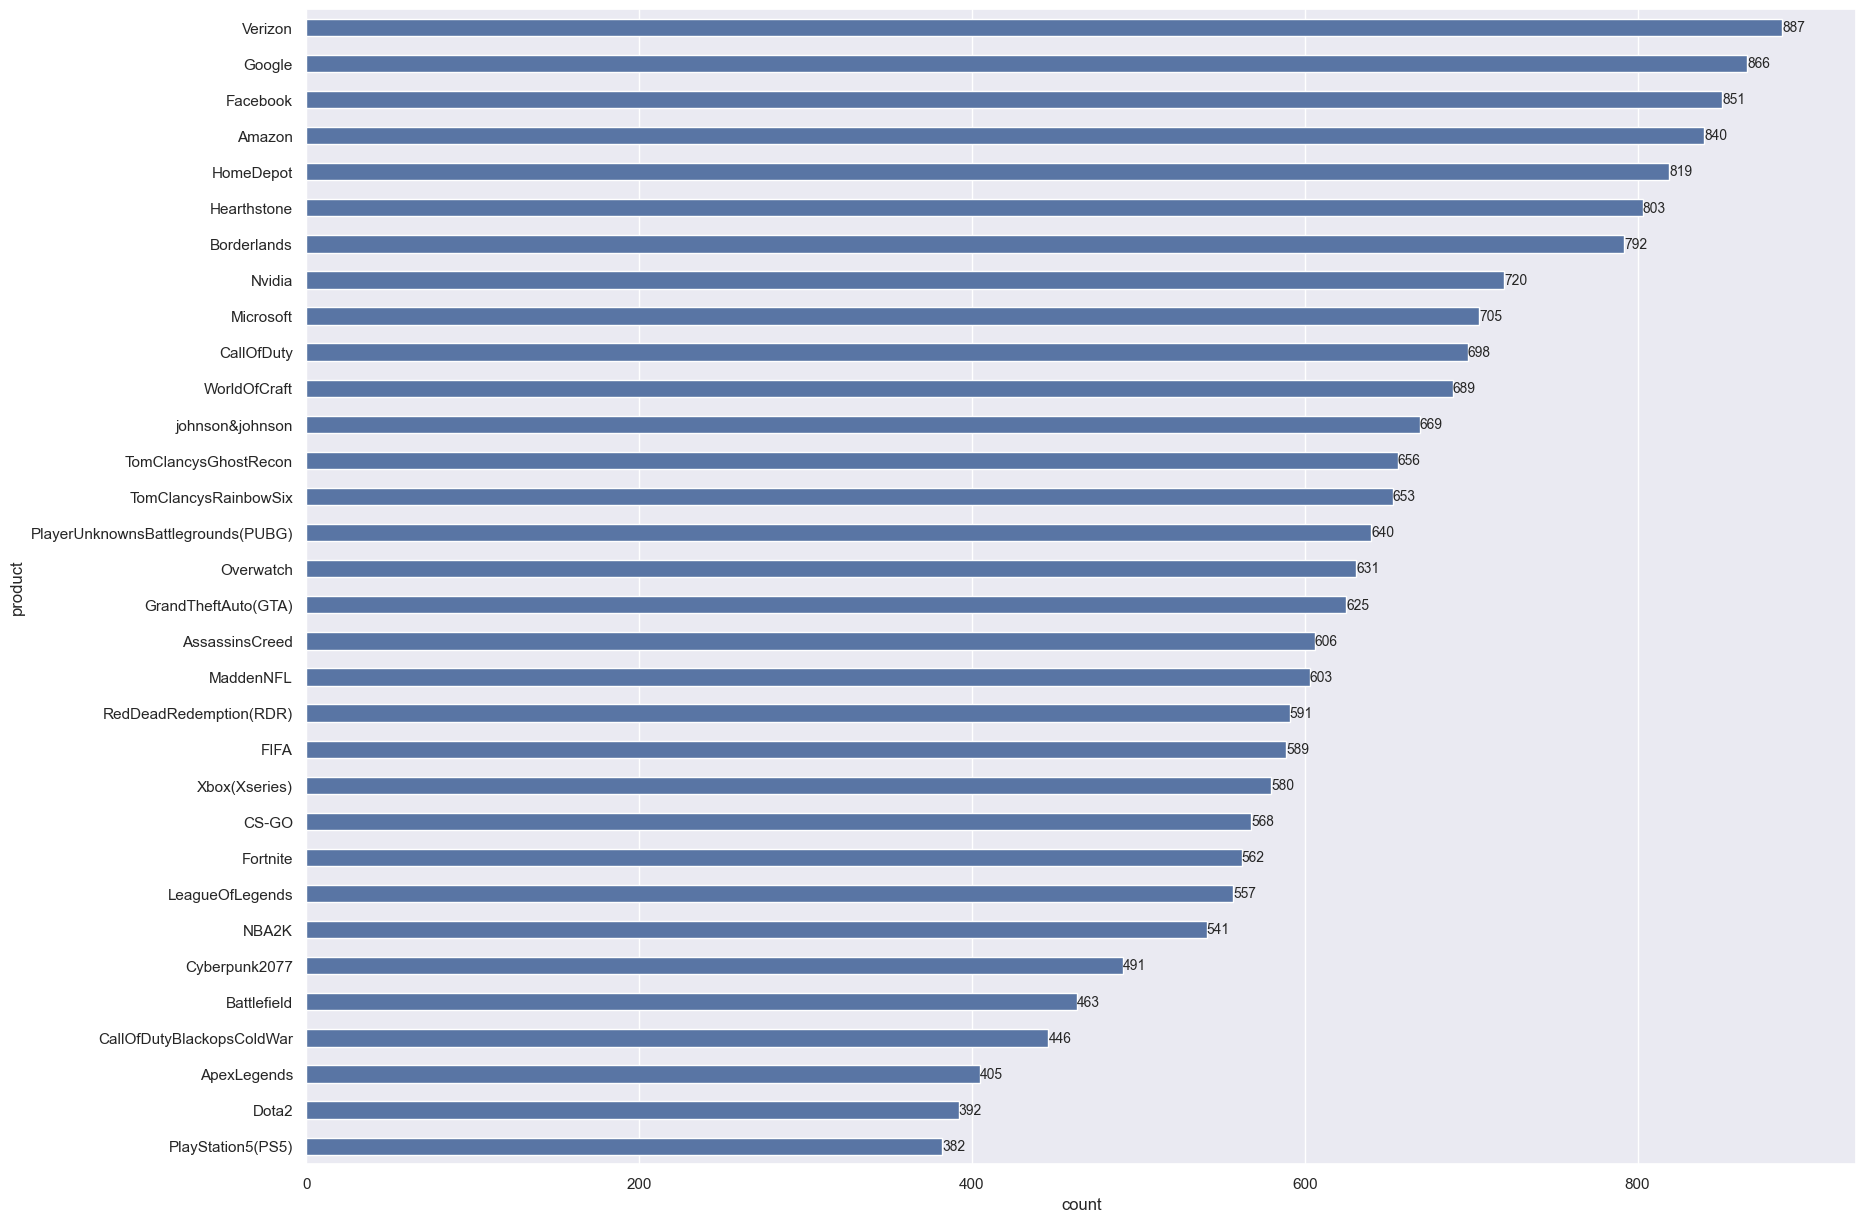

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(rc={'figure.figsize':(5,25)})
plt.subplots(figsize=(20,15))

ax = sns.barplot(data=res, y='product', x='count', width=0.6, gap=0.2, errorbar=None )
ax.bar_label(ax.containers[0], fontsize=10);

plt.show()

## **Observations:**

After data cleaning, we have:

* Products with top 3 highest number of tweets:

    - Verizon (n = 887)

    - Google (n = 866)

    - Facebook (n = 851)

* Products with bottom 3 lowest number of tweets:

    - ApexLegends (n = 405)

    - Dota2 (n = 392)

    - PlayStation5(PS5) (n = 382)

---
# **Mod 4: Score Data**
---

In [236]:
# number rows with no tweets
print(f"Rows without tweets: {df['tweet_text'].isna().sum()}")

# keep row with tweets only
df = df[df['tweet_text'].notna()]

# score the sentences
df['tweet_text_clean'] = df['tweet_text'].map(lambda x:  func_clean(x))

# turn emojis to text
df['tweet_text_clean'] = df['tweet_text_clean'].map(lambda x:  func_turn_emoji_to_text(x))

# remove remaining emojis
df['tweet_text_clean'] = df['tweet_text_clean'].map(lambda x:  func_remove_emojies(x))

# turn text to lower case
df['tweet_text_clean'] = df['tweet_text_clean'].map(lambda x:  func_lower(x))

# tokenize
df['tweet_text_clean'] = df['tweet_text_clean'].map(lambda x:  func_tokenize(x))

# lemmitize
df['tweet_text_clean'] = df['tweet_text_clean'].map(lambda x:  func_lemmitize(x))

# tweet length
df['word_count'] = df['tweet_text_clean'].map(lambda x: func_len_word(x))

# limit data to tweets with more than 25 words
df = df[df['word_count']>25]

# attach sentiment score to each tweet
df['tweet_score'] = df['tweet_text_clean'].map(lambda x:  sentiment_score (x))

# Defining all the conditions inside a function
def condition(x):
    if x<0:
        return "negative"
    elif x>0:
        return "positive"
    else:
        return 'neutral'

# map each tweet score to negative, neutral and positive
df['score_sentiment'] = df['tweet_score'].map(lambda x: condition(x))
df.head()

Rows without tweets: 0


,id,product,tweet_text,tweet_text_clean,word_count,tweet_score,score_sentiment
6,2402,Borderlands,So I spent a few hours making something for fu...,so i spent a few hour making something for fun...,55,0.312500,positive
7,2402,Borderlands,So I spent a couple of hours doing something f...,so i spent a couple of hour doing something fo...,57,0.295833,positive
8,2402,Borderlands,So I spent a few hours doing something for fun...,so i spent a few hour doing something for fun ...,29,0.275000,positive
9,2402,Borderlands,So I spent a few hours making something for fu...,so i spent a few hour making something for fun...,55,0.312500,positive
10,2402,Borderlands,2010 So I spent a few hours making something f...,2010 so i spent a few hour making something fo...,56,0.312500,positive


---
# **Mod 5: Summarize Data** 
---

In [237]:
# summarize percent tweets for each product by score sentiment
res = df.groupby('product')['score_sentiment'].value_counts()
res = pd.DataFrame(res).reset_index()
res['total'] = res.groupby('product')['count'].transform('sum')
res['xlab'] = res['product'] + " (N="+res['total'].astype('str') +")"
res['percent'] = 100 * round(res['count']/res['total'], 1) 
res

,product,score_sentiment,count,total,xlab,percent
0,Amazon,positive,593,840,Amazon (N=840),70.0
1,Amazon,negative,173,840,Amazon (N=840),20.0
2,Amazon,neutral,74,840,Amazon (N=840),10.0
3,ApexLegends,positive,210,405,ApexLegends (N=405),50.0
4,ApexLegends,negative,165,405,ApexLegends (N=405),40.0
...,...,...,...,...,...,...
91,Xbox(Xseries),negative,194,580,Xbox(Xseries) (N=580),30.0
92,Xbox(Xseries),neutral,62,580,Xbox(Xseries) (N=580),10.0
93,johnson&johnson,positive,314,669,johnson&johnson (N=669),50.0
94,johnson&johnson,negative,242,669,johnson&johnson (N=669),40.0


---
# **Mod 6: Business Insights** 
---

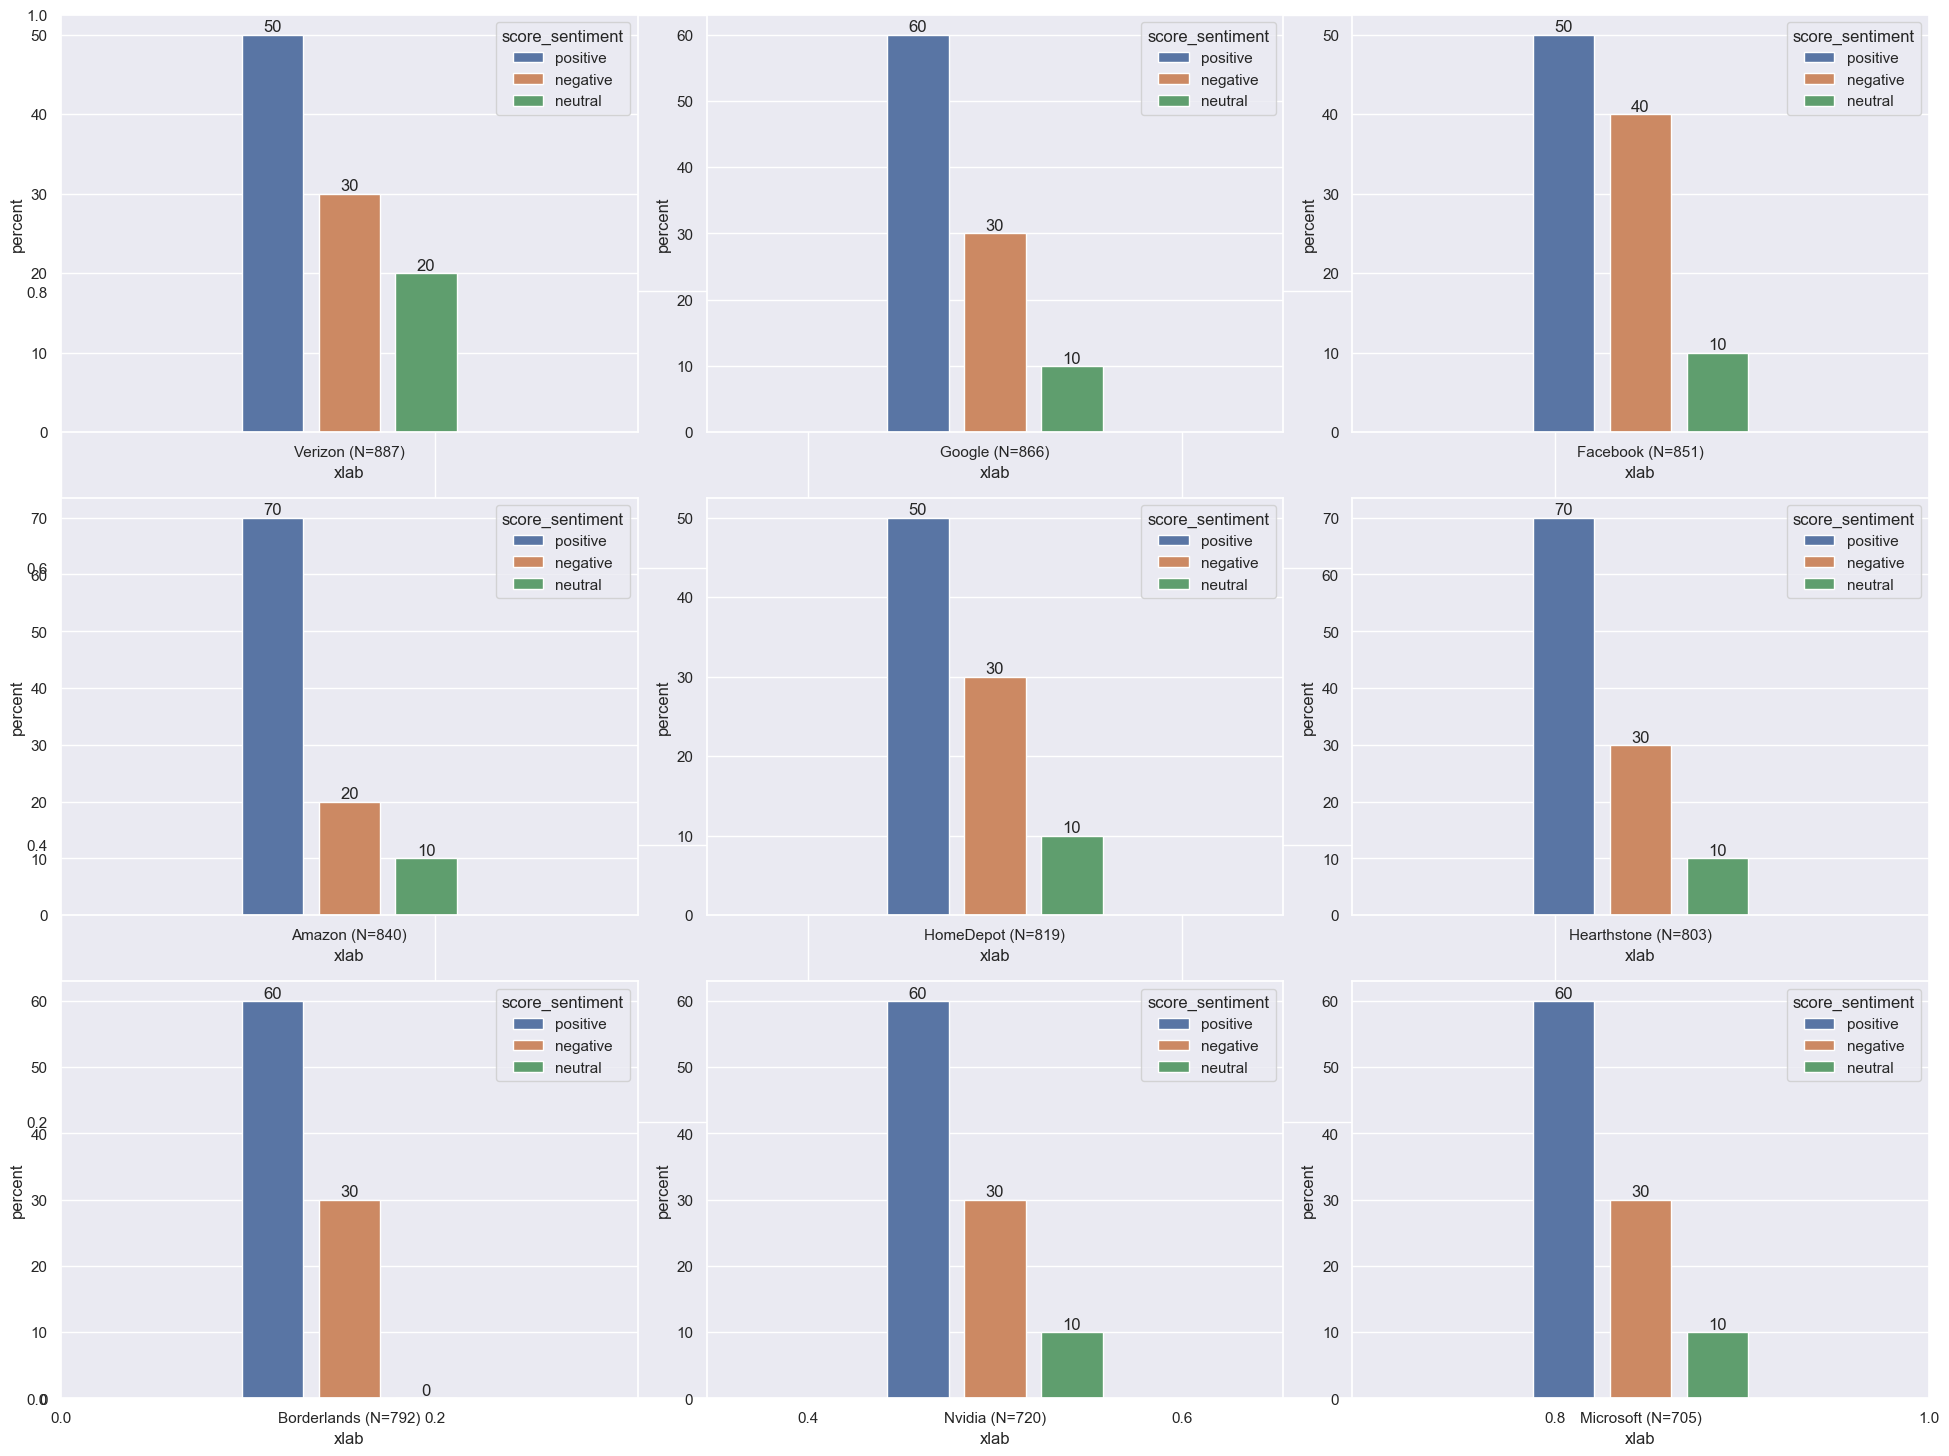

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
 

# sns.set_theme(rc={'figure.figsize':(5,25)})
plt.subplots(figsize=(20,15))

products =['Verizon','Google','Facebook','Amazon','HomeDepot','Hearthstone','Borderlands','Nvidia','Microsoft']

for i, col in enumerate(products):
  plt.subplot(3,3, i + 1)
 
  ax = sns.barplot(data=res [res['product']== col], x='xlab', y='percent', hue='score_sentiment', width=0.4, gap=0.2 )
  for container in ax.containers:
    ax.bar_label(container)
  plt.tight_layout()
 
plt.show()

## Mod 6-1: Verizon Business Insights

* Out of the 887 tweets related to Verizon

  -  50% expressed positive sentiment

  -  30% conveyed negative sentiment

  -  20% displayed neutral sentiment
  
* Next, the analyst may print example of tweets with positive sentiment and tweets with negative sentiment

* Tweets with negative sentiment can be reviewed by the crossfunctional team to find areas of product improvement

In [244]:
df[(df['product'] == "Verizon") & (df['score_sentiment'] == "positive")][['product', 'tweet_text', 'score_sentiment']].head(10)

,product,tweet_text,score_sentiment
42412,Verizon,VERIZON KICKS OFF SUPER BOWL RETURN WITH FUTUR...,positive
42414,Verizon,VERIZON KICKS OFF SUPER BOWL RETURN with FUTUR...,positive
42415,Verizon,VERIZON Z ON SUPER BOWL RETURN FROM FUTURISTIC...,positive
42416,Verizon,VERIZON KICKS TO OFF SUPER BOWL IS RETURN WITH...,positive
42417,Verizon,VERIZON<unk> OFF SUPER BOWL RETURN TO FUTURIST...,positive
42466,Verizon,Funny how this issue is not HUGE during this p...,positive
42467,Verizon,Funny how this problem is not BIG during this ...,positive
42468,Verizon,Funny how this problem isn't HUGE during this ...,positive
42469,Verizon,Funny how this feature is not HUGE during each...,positive
42470,Verizon,Funny how this issue is so not like HUGE durin...,positive


In [246]:
df[(df['product'] == "Verizon") & (df['score_sentiment'] == "negative")][['product', 'tweet_text', 'score_sentiment']].tail(10)

,product,tweet_text,score_sentiment
44687,Verizon,"Verizon Sheds 81,000 Pay TV Customers as Cord-...",negative
44688,Verizon,"Verizon loses 81,000 pay TV customers because ...",negative
44689,Verizon,"Verizon Sheds 81,000 Pay TV Customers as Cord-...",negative
44690,Verizon,"Verizon Sheds 81,000 Home TV Customers as Cord...",negative
44691,Verizon,"Verizon Sheds 81, 66 000 Pay TV Target Custome...",negative
44692,Verizon,"Verizon Sheds 81,000 Digital TV On The Black-C...",negative
44729,Verizon,@verizonmedia @Verizon how long are you going...,negative
44731,Verizon,@ verizonmedia @ Verizon how long are you goin...,negative
44732,Verizon,@verizonmedia @Verizon how long are you plann...,negative
44734,Verizon,@verizonmedia Q how long if you going to give ...,negative
